In [51]:
#importing libraries
import numpy as np # number
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization
import pandas as pd # Data analysis
from sklearn.model_selection import train_test_split # Spliting data
from sklearn.linear_model import LinearRegression # Perform modelling

In [2]:
w=pd.read_csv(r"C:\Users\Krishna\Desktop\machine learning\Linear Regr\weatherHistory - Assignment.csv")
w

,Summary,Precip Type,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Temperature (C)
0,Partly Cloudy,rain,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.,9.472222
1,Partly Cloudy,rain,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.,9.355556
2,Mostly Cloudy,rain,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.,9.377778
3,Partly Cloudy,rain,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.,8.288889
4,Mostly Cloudy,rain,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.,8.755556
...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,0.43,10.9963,31,16.1000,0,1014.36,Partly cloudy starting in the morning.,26.016667
96449,Partly Cloudy,rain,0.48,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.,24.583333
96450,Partly Cloudy,rain,0.56,8.9838,30,16.1000,0,1015.66,Partly cloudy starting in the morning.,22.038889
96451,Partly Cloudy,rain,0.60,10.5294,20,16.1000,0,1015.95,Partly cloudy starting in the morning.,21.522222


In [3]:
w['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [4]:
w['Daily Summary'].unique()

array(['Partly cloudy throughout the day.',
       'Mostly cloudy throughout the day.', 'Foggy in the evening.',
       'Foggy overnight and breezy in the morning.',
       'Overcast throughout the day.', 'Partly cloudy until night.',
       'Mostly cloudy until night.',
       'Foggy starting overnight continuing until morning.',
       'Foggy in the morning.', 'Partly cloudy until evening.',
       'Partly cloudy starting in the morning.',
       'Mostly cloudy starting overnight continuing until night.',
       'Mostly cloudy until evening.',
       'Partly cloudy starting in the morning continuing until evening.',
       'Partly cloudy starting in the afternoon.',
       'Partly cloudy starting overnight.',
       'Partly cloudy until morning.',
       'Partly cloudy starting overnight continuing until night.',
       'Partly cloudy starting in the afternoon continuing until night.',
       'Mostly cloudy starting overnight.',
       'Partly cloudy until afternoon.',
       'Mostly

In [5]:
w['Loud Cover'].unique()

array([0], dtype=int64)

In [6]:
w.dtypes3# checking the datatype of each column

Summary                    object
Precip Type                object
Humidity                  float64
Wind Speed (km/h)         float64
Wind Bearing (degrees)      int64
Visibility (km)           float64
Loud Cover                  int64
Pressure (millibars)      float64
Daily Summary              object
Temperature (C)           float64
dtype: object

In [7]:
w['Summary']=w['Summary'].astype('category')
w['Precip Type']=w['Precip Type'].astype('category')
w['Daily Summary']=w['Daily Summary'].astype('category')

In [8]:
w.dtypes

Summary                   category
Precip Type               category
Humidity                   float64
Wind Speed (km/h)          float64
Wind Bearing (degrees)       int64
Visibility (km)            float64
Loud Cover                   int64
Pressure (millibars)       float64
Daily Summary             category
Temperature (C)            float64
dtype: object

In [9]:
w['Summary']=w['Summary'].cat.codes
w['Precip Type']=w['Precip Type'].cat.codes
w['Daily Summary']=w['Daily Summary'].cat.codes

In [10]:
w

,Summary,Precip Type,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Temperature (C)
0,19,0,0.89,14.1197,251,15.8263,0,1015.13,197,9.472222
1,19,0,0.86,14.2646,259,15.8263,0,1015.63,197,9.355556
2,17,0,0.89,3.9284,204,14.9569,0,1015.94,197,9.377778
3,19,0,0.83,14.1036,269,15.8263,0,1016.41,197,8.288889
4,17,0,0.83,11.0446,259,15.8263,0,1016.51,197,8.755556
...,...,...,...,...,...,...,...,...,...,...
96448,19,0,0.43,10.9963,31,16.1000,0,1014.36,170,26.016667
96449,19,0,0.48,10.0947,20,15.5526,0,1015.16,170,24.583333
96450,19,0,0.56,8.9838,30,16.1000,0,1015.66,170,22.038889
96451,19,0,0.60,10.5294,20,16.1000,0,1015.95,170,21.522222


In [11]:
w['Daily Summary'].max()

213

In [12]:
w['Summary'].max()

26

In [13]:
w.describe()

,Summary,Precip Type,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Temperature (C)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453.000000,96453.000000
mean,16.006024,0.105699,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,129.308057,11.932678
std,4.361497,0.324420,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,56.275398,9.551546
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-21.822222
25%,17.000000,0.000000,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,95.000000,4.688889
50%,18.000000,0.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,118.000000,12.000000
75%,19.000000,0.000000,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,181.000000,18.838889
max,26.000000,1.000000,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000,213.000000,39.905556


In [14]:
w.isnull().sum()# checking for any null values and missing values

Summary                   0
Precip Type               0
Humidity                  0
Wind Speed (km/h)         0
Wind Bearing (degrees)    0
Visibility (km)           0
Loud Cover                0
Pressure (millibars)      0
Daily Summary             0
Temperature (C)           0
dtype: int64

In [15]:
w.dtypes# checking all the values are numerical or not

Summary                      int8
Precip Type                  int8
Humidity                  float64
Wind Speed (km/h)         float64
Wind Bearing (degrees)      int64
Visibility (km)           float64
Loud Cover                  int64
Pressure (millibars)      float64
Daily Summary               int16
Temperature (C)           float64
dtype: object

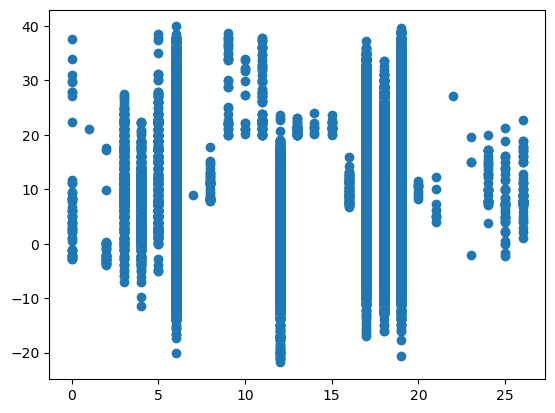

In [16]:
plt.scatter(w['Summary'],w['Temperature (C)'])
plt.show()

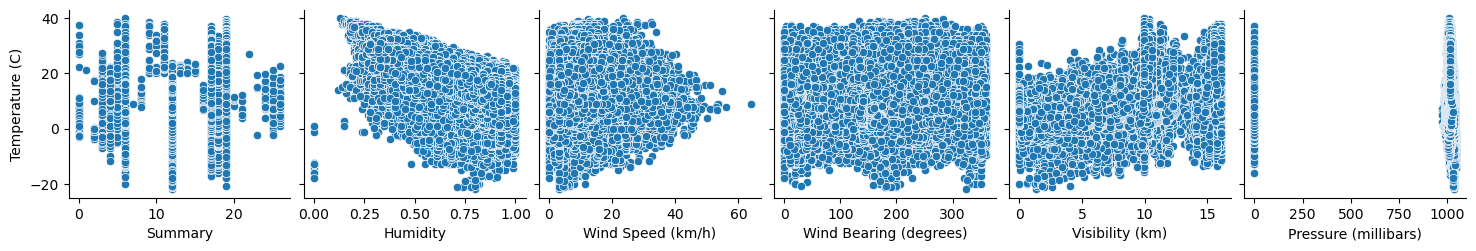

In [17]:
sns.pairplot(w,x_vars=['Summary','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)'],y_vars='Temperature (C)')

In [50]:
#Splitting data into IV and DV

In [ ]:
#x=w[['Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']]
#y=w['Temperature (C)']

In [19]:
x=w.drop('Temperature (C)',axis=1)
y=w['Temperature (C)']

In [20]:
len(w)

96453

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [22]:
len(x_train),len(y_train)

(77162, 77162)

In [23]:
len(x_test),len(y_test)

(19291, 19291)

In [24]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pre=lr.predict(x_test)

In [25]:
x_test.head()

,Summary,Precip Type,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
81153,17,0,0.79,4.9749,7,8.1305,0,1022.45,35
30707,19,0,0.55,11.5437,192,11.4471,0,1017.39,111
35276,19,0,0.78,3.1234,215,10.3523,0,1015.14,111
86251,18,0,0.94,13.8943,51,4.0733,0,1012.28,143
12853,6,0,0.22,15.7941,0,9.9820,0,1017.30,29


In [26]:
x_test.dtypes


Summary                      int8
Precip Type                  int8
Humidity                  float64
Wind Speed (km/h)         float64
Wind Bearing (degrees)      int64
Visibility (km)           float64
Loud Cover                  int64
Pressure (millibars)      float64
Daily Summary               int16
dtype: object

In [27]:
#hum=input("Enter the Humidity~ Values ranges from 0 to 1:")
#ws=input("Enter the Wind Speed(km/h)~ Values ranges from 0 to 64:")
#wb=input("Enter the Wind Bearing(degrees)~ Values ranges from 0 to 360:")
#vis=input("Enter the Visibility(km)~ Values ranges from 0 to 16:")
#pres=input("Enter the Pressure(millibars)~ Values ranges from 1000 to 1050:")
#temperatue=np.array([[hum,ws,wb,vis,pres]])

In [28]:
#lr.predict([[hum,ws,wb,vis,pres]])

In [29]:
lr.predict([[6,0,0.85,8.5689,150,7.5264,0,1015.25,150],[15,0,0.84,7.5689,160,8.2356,0,1010.35,100]])

C:\Users\Krishna\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10.3633683 , 10.18755292])

In [30]:
y_test# actual value

81153     2.361111
30707    19.638889
35276    11.422222
86251    12.644444
12853    27.800000
           ...    
24619     0.055556
48538    24.883333
23765    11.066667
20487     0.877778
19256     3.816667
Name: Temperature (C), Length: 19291, dtype: float64

In [31]:
#lr.predict([[1.00,63.0000,350,16.0000,1045.00]])

In [40]:
pre

array([10.26412087, 17.43132489, 13.26123173, ..., 12.26743457,
        7.37251366,  9.17437786])

In [ ]:
#Evaluating the Model

In [41]:
from sklearn.metrics import r2_score
r2_score(y_test,pre)

0.607908028427278

In [45]:
def mean_absolute_percentage_error(y_test, pre): # MAPE
    value=np.mean(np.abs((y_test - pre) / y_test)) * 100
    return value

In [46]:
abs(-100)

100

In [48]:
mean_absolute_percentage_error(y_test, pre)

inf